## MATEMÁTICAS DISCRETAS: Teoría de Grafos

## Notebook 3: Single Source Shortest Path

1. Determinar las rutas más cortas entre la empresa y sus clientes usando el algoritmo de Dijkstra..

### Librerias
Las librerias que usaremos seran:

**math** : Calcular la distancia entre los nodos y realizar otras operaciones aritmeticas.

**matplotlib** y **networkx** : Representar las rutas más cortas

In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx

### Clases

Usaremos la clase **Nodo** para almacenar el nombre del vertice y su posicion en el plano cartesiano *XY*

In [2]:
class Nodo:
    def __init__(self,nombre,x,y):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.adyacentes = []

### Funciones
* **calcularPeso :** Usaremos esta funcón para calcular el peso de las aristas

In [3]:
def calcularPeso(nodoA, nodoB):
    deltaX = (nodoA.x - nodoB.x)*100
    deltaY = (nodoA.y - nodoB.y)*100
    distancia = math.sqrt(  pow(deltaX,2) + pow(deltaY,2)  )
    return distancia

* **mostrarRuta**: Usaremos esta función para obtener la ruta desde J hasta el nodo ingresado

In [4]:
def mostrarRuta(nodo):
    x = caminos[nodo]
    if x == "J":
        return ["J"]
    else:
        return [x] + mostrarRuta(x)

### Estructuras de datos iniciales

In [5]:
# Declaracion de la matriz vertices en donde se encuentran la posiciones de nuestro nodos  
vertices = [         
    ["A", 2,  1 ],
    ["B", 19, 1 ],
    ["C", 5,  2 ],
    ["D", 11, 3 ],
    ["E", 18, 5 ],
    ["F", 4,  6 ],
    ["G", 12, 7 ],
    ["H", 20, 8 ],
    ["I", 16, 10],
    ["J", 10, 10],
    ["K", 7,  11],
    ["L", 5,  13],
    ["M", 11, 13],           
    ["N", 19, 14],
    ["O", 16, 16],
    ["P", 4,  17],
    ["Q", 9,  17],
    ["R", 11, 19],
    ["S", 1,  20],
    ["T", 20, 20] 
]

# Declaracion de la matriz adyacencia en donde esta las relaciones de adyacencia de nuestros nodos
adyacencia = [    
    [0 , 1 , 1 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 0 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0],
    [1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 1 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0],
    [0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 1 , 0 , 1 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 1 , 0],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1],
    [0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 1],
    [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 1 , 1 , 0],            
]

### Arreglos nodos[ ] y aristas[ ] 
* **nodos :** Almacenan los nodos de nuestro grafo
* **aristas :** Almacenan las aristas de nuestro grafo con sus respectivos pesos

In [6]:
# Haciendo uso de la matriz vertices y la clase Nodo
# Creamos un objeto Nodo el cual almacenara el nombre del vertice y sus coordenadas
nodos = []
for i in range(0,len(vertices)):
    nombre = vertices[i][0]
    x = vertices[i][1]
    y = vertices[i][2]    
    newNodo = Nodo(nombre,x,y)
    nodos.append(newNodo)
    
# Haciendo uso de nuestro arreglo de nodos y la matriz de adyacencia
# Agregamos las aritas de nuestro grafo a un arreglo de aristas con sus respectivos pesos
# Simultaneamente tambien agregamos a cada objeto Nodo sus Nodos adyacentes
aristas = []
for i in range(0, 20):    
    for j in range (0,20):
        if i < j:
            if(adyacencia[i][j] == 1):
                # Aqui creamos las aristas con sus pesos
                a = nodos[i].nombre
                b = nodos[j].nombre                
                c = calcularPeso(nodos[i],nodos[j])
                c = round(c,2)
                aristas.append( [a,b,c] )   
                
                # Aqui agregamos los Nodos adyacentes a cada Nodo perteneciente a nuestro arreglo nodos
                nodos[i].adyacentes.append(nodos[j])
                nodos[j].adyacentes.append(nodos[i])

# Derterminación de las rutas más cortas

Para determinar las rutas más cortas haremos uso de dos algoritmos, **Dijkstra** como algoritmos principal y **HeapSort** como algoritmo utilizado para ordenar la cola de prioridad.


## Algoritmo de Dijkstra
### Procedimiento
* Inicializar todas las distancias en D con un valor infinito relativo, ya que son desconocidas al principio, exceptuando la de x, que se debe colocar en 0, debido a que la distancia de x a x sería 0.
* Sea a = x (Se toma a como nodo actual.)
* Se recorren todos los nodos adyacentes de a, excepto los nodos marcados. Se les llamará nodos no marcados vi.
* Para el nodo actual, se calcula la distancia tentativa desde dicho nodo hasta sus vecinos con la siguiente fórmula: dt(vi) = Da + d(a,vi). Es decir, la distancia tentativa del nodo ‘vi’ es la distancia que actualmente tiene el nodo en el vector D más la distancia desde dicho nodo ‘a’ (el actual) hasta el nodo vi. Si la distancia tentativa es menor que la distancia almacenada en el vector, entonces se actualiza el vector con esta distancia tentativa. Es decir, si dt(vi) < Dvi → Dvi = dt(vi)
* Se marca como completo el nodo a.
* Se toma como próximo nodo actual el de menor valor en D (puede hacerse almacenando los valores en una cola de prioridad) y se regresa al paso 3, mientras existan nodos no marcados.

Una vez terminado el algoritmo, D estará completamente lleno.

### Implementación de HeapSort

In [7]:
def heapify(arr, n, i,index): 
    menor = i  # menor sera la raiz 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # Vemos si el hijo de la izquierda de la raiz existe,
    # y si es mayor que la raiz
    if l < n and arr[i] < arr[l]: 
        menor = l 
  
    # Vemos si el hijo de la dereacha de la raiz existe
    # y si es mayor que la raiz
    if r < n and arr[menor] < arr[r]: 
        menor = r 
  
    # Si la raiz no es la menor entramos
    if menor != i: 
        arr[i],arr[menor] = arr[menor],arr[i]  # Intercambiamos 
        index[i],index[menor] = index[menor],index[i]
        
  
        # Heapify en la raiz
        heapify(arr, n, menor,index) 

# Funcion principal
def heapSort(arr,index): 
    n = len(arr)   
    # Construimos el minHeap
    for i in range(n, -1, -1): 
        heapify(arr, n, i,index) 

    # Uno por uno extraemos elementos
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i]   # Intercambiamos      
        index[i],index[0] = index[0],index[i]
        heapify(arr, i, 0,index) 

### Implementación Dijkstra

In [8]:
def Dijkstra(grafo,sNode):
    infinito = float("inf")
    
    estado = {}      # Almacena si cada nodo ha sido visitado
    distancia = {}   # Almacena la distancia del nodo raiz a cada nodo en numero de aristas
    padre = {}       # Almacena el nodo padre de cada nodo
    adyacencia = []  # Almacena los nodos adyacentes del nodo iterado
    
    # Valores iniciales de cada nodo del grado
    for uNode in grafo:
        distancia[uNode] = infinito
        padre[uNode] = None
        estado[uNode] = False
     
    # Valores iniciales del Nodo raiz
    distancia[sNode] = 0
    # Agregamos el Nodo raiz y su distancia al nodo raiz
    # a la cola de prioridad (en este caso la distancia sera siempre 0)    
    cola = [[sNode],[distancia[sNode]]] 
    
    # El bucle se ejecutara siempre que la cola siga teniendo elementos
    while cola[0]:    
        heapSort(cola[1],cola[0]) # Cada vez que entramos ordenamos la cola de menor a mayor
        uNode = cola[0].pop(0)    # Extraemos el primer elemento de la cola Nodos 
                                  # Lo guardamos en uNode
        borrar = cola[1].pop(0)   # Extraemos el primer elemento de la cola Distancias

        adyacencia = grafo[uNode] # Guardamos los nodos adyacentes de uNode
        estado[uNode] = True      # Ahora uNode ya ha sido visitado
        for vNode in adyacencia:  # Pasamos por todos los nodos adyacentes de uNode
            # Si la distancia de vNode a la raiz es mayor que
            # la distancia que hay desde la raiz a uNode + la distancia entre uNode y vNode
            # Entramos
            if distancia[vNode] > distancia[uNode] + calcularPeso(uNode,vNode):
                # Ahora asignamos la distancia nueva de vNode al nodo Raiz
                distancia[vNode] = distancia[uNode] + calcularPeso(uNode,vNode)
                # El padre de vNode sera uNode
                padre[vNode] = uNode 
                # Agregamos vNode y su distancia a la colad e prioridad
                cola[0].append(vNode)
                cola[1].append(distancia[vNode])
                
                   
    # Retornamos el diccionario padre, nos seriva para graficar las rutas
    return padre    
   

**Creacion de nuestro diccionario grafo**

A diferencia del diccionario **grafo** implementado en ***notebook1.ipynb*** en esta notebook almacenaremos los indice e items del diccionario como objetos *Nodo* en vez de simplemente sus etiquetas, decidimos realizar este cambio debido a que la funcion **Dijkstra** llama al metodo **calcularPeso()** y este recibe como parametros dos objetos de tipo Nodo.

In [9]:
# Almacenamos nuestro grafo en un diccionario para así recorrerlo usando nuestro algoritmo Dijkstra
# Cada indice del diccionario hace referencia a un objeto Nodo del grafo 
# y su items hacen referencia a los Nodos adyacentes a dicho Nodo

grafo = {} 
for node in nodos:
    adyacentesNombre = []
    for iNode in node.adyacentes:
        adyacentesNombre.append(iNode)
        
    grafo[node] = adyacentesNombre   

### Ejecución de Dijkstra

In [10]:
dijkstra = Dijkstra(grafo,nodos[9])


### Estructuras de datos para representar nuestras rutas
Antes de iniciar con la representación de las rutas, transcribimos la informacion obtenida de nuestra función *Dijkstra* de tal forma que el grafo implementado por la libreria *nx* pueda entenderlo

In [11]:
# Aqui guardamos las rutas como aristas de un nuevo grafo
caminos = {} 
for x in dijkstra:
    s = x.nombre
    y = dijkstra[x]
    # Si este indice no tiene items significa que es el nodo Raiz 
    # Ya que el nodo Raiz es el padre de todos los nodos y no tiene padre 
    if y != None:         
        caminos[s] = y.nombre    
        
# Crearemos un diccionario que relacione las etiquetas de los nodos con el respectivo nodo
# Esto nos facilitara las asignaciones a la hora de agregar las aristas al grafo
jnodos = {}
for x in nodos:
    a = x.nombre
    jnodos[a] = x

### Representación del  Single Source Shortest Path

De forma similar a la representación de nuestro grafo original presentado en ***notebook1.ipynb*** realizaremos ahora la representación de nuestras rutas mas cortas, solo que ahora usaremos los dicionarios *dijkstra* para asignar las aristas de nuestro arbol, debido a que usaremos las mismas coordenadas crearemos un diccionario *dict* igual al usado en ***notebook1.ipynb***.

En este caso podemos dividir la representacion en la siguientes partes:
1. Asignación
2. Dibujado

    **Asignación**
    * Creamos un nuevo grafo $G$ usando la libreria *nx*
    * Agregamos las aristas almacenadas en el diccionario *dijkstra*
    
   **Dibujado**
    * Ajustar el tamaño del canvas
    * Dibujar nodos
    * Dibujar aristas
    * Dibujar etiquetas de los nodos
    * Mostrar el arbol

### Asignación

In [12]:
# Creacion del grafo
G = nx.Graph()

# Agregamos las aristas (rutas mas cortas) al grafo
for x in caminos:
    # Accedemos al nodo que hace referencia cada vertice de la arista
    # Con el fin de calcular la distancia entre estas
    a = jnodos[caminos[x]]
    b = jnodos[x]
    c = calcularPeso(a,b)
    c = round(c,2)
    G.add_edge(caminos[x],x, weight = c)

# Diccionario con las posiciones de todos los nodos
dict = {}
for nodo in vertices:
    nombre = nodo[0]
    xPos = nodo[1]
    yPos = nodo[2]
    dict[nombre] = (xPos,yPos)    
pos = dict  

### Dibujado

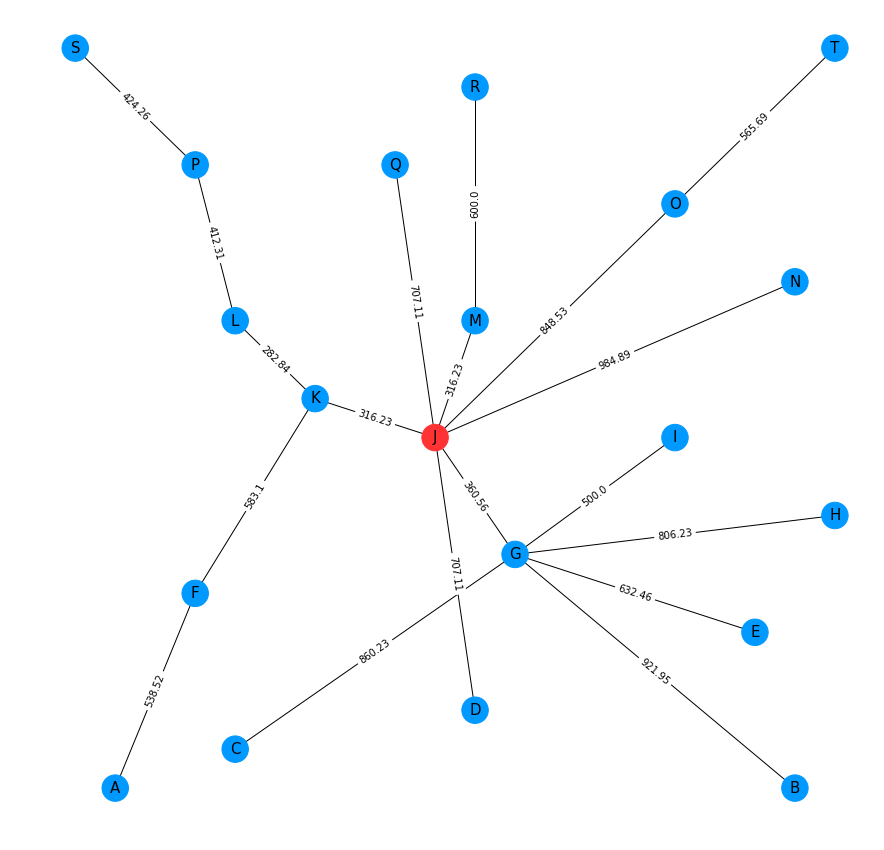

In [13]:
# Tamaño del Canvas
plt.figure(figsize = (15,15))

# Se dibujan los nodos
val_map = {'J': (1,0.2,0.2)}
values = [ val_map.get(node , (0, 0.6, 1)) for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=700,node_color = values)

# Se dibujan las aristas
nx.draw_networkx_edges(G, pos, width=1)

# Se dibujan los nombres de los nodos y el peso de las aristas
nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels)

plt.axis("off") # Con esta linea ocultamos los ejes de coordenadas
plt.show()      # Mostramos todas las llaadas de dibujado realizadas anteriormente

### Rutas desde J hasta el resto de Nodos del grafo

In [14]:
for i in caminos:
    s = [] # arreglo con las rutas
    d = 0   # Aqui almacenamos la distancia
    # Creamos un arreglo ruta que inicia en el nodo actual y termina en J
    ruta = [i] + mostrarRuta(i) 
    
    # recorremos el arreglo ruta en reversa para mostrar primero el nodo raiz J
    for j in reversed(ruta):        
        s = s + [j]       
    
    # Calculamos la distancia desde el nodo actual hasta J
    for k in range(len(ruta) -1):
        a = jnodos[ruta[k]]
        b = jnodos[ruta[k+1]]
        d = d + calcularPeso(a,b)
        
    # Mostraremos solo dos cifras significativas    
    d = round(d,2)    
    print("Ruta desde J hasta " + i + " || Distancia: " + str(d) + " metros")
    print(s)
    print("\n")
        

Ruta desde J hasta A || Distancia: 1437.84 metros
['J', 'K', 'F', 'A']


Ruta desde J hasta B || Distancia: 1282.51 metros
['J', 'G', 'B']


Ruta desde J hasta C || Distancia: 1220.79 metros
['J', 'G', 'C']


Ruta desde J hasta D || Distancia: 707.11 metros
['J', 'D']


Ruta desde J hasta E || Distancia: 993.01 metros
['J', 'G', 'E']


Ruta desde J hasta F || Distancia: 899.32 metros
['J', 'K', 'F']


Ruta desde J hasta G || Distancia: 360.56 metros
['J', 'G']


Ruta desde J hasta H || Distancia: 1166.78 metros
['J', 'G', 'H']


Ruta desde J hasta I || Distancia: 860.56 metros
['J', 'G', 'I']


Ruta desde J hasta K || Distancia: 316.23 metros
['J', 'K']


Ruta desde J hasta L || Distancia: 599.07 metros
['J', 'K', 'L']


Ruta desde J hasta M || Distancia: 316.23 metros
['J', 'M']


Ruta desde J hasta N || Distancia: 984.89 metros
['J', 'N']


Ruta desde J hasta O || Distancia: 848.53 metros
['J', 'O']


Ruta desde J hasta P || Distancia: 1011.38 metros
['J', 'K', 'L', 'P']


Ruta desde

*Matematicas Discretas - Universidad Industrial de Santander*

* *Brayan Esneider Monroy Chaparro*
* *Juan Jose*
* *Sebastian Leon*